<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego mientras hacía este trabajo.</small>
</p>

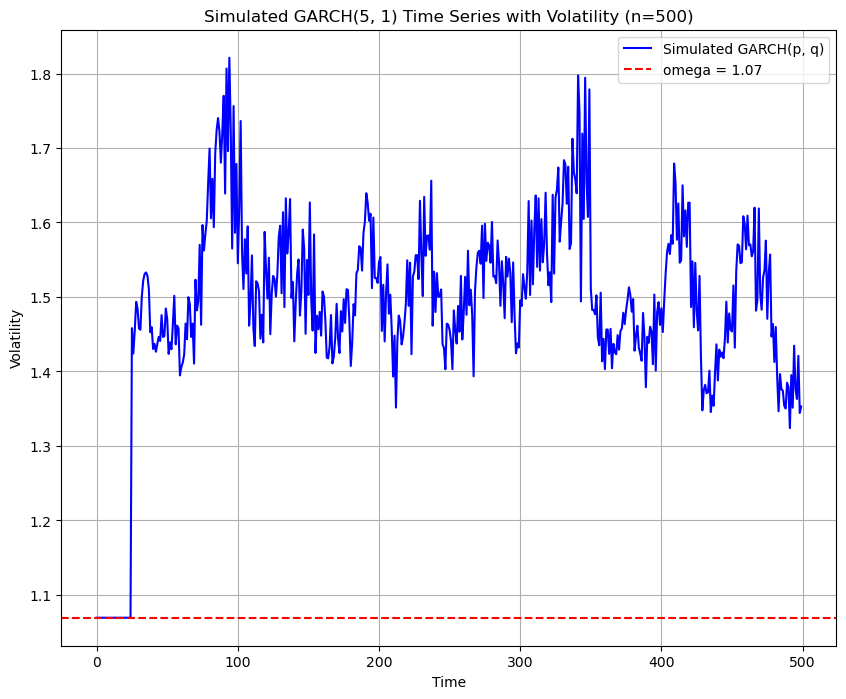

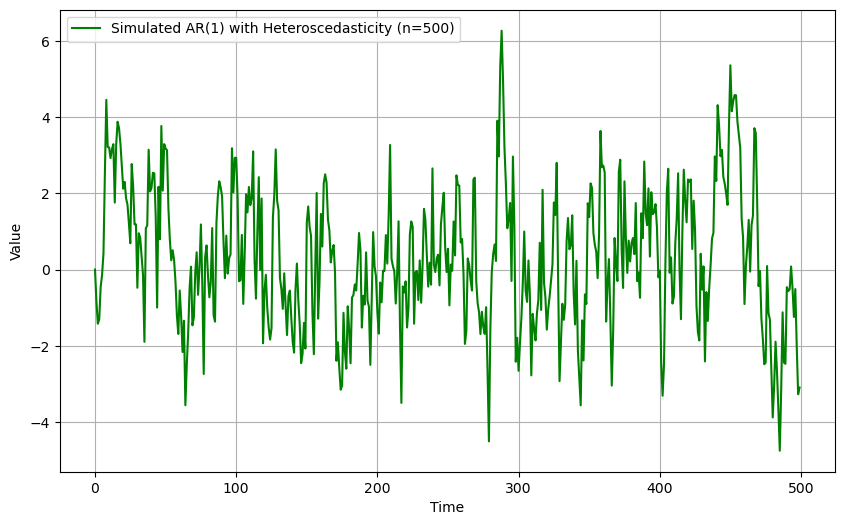

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def simulate_garch(p, q, n):
    # Generate GARCH(p, q) model parameters
    alpha = np.random.uniform(0, 0.3, p)
    beta = np.random.uniform(0, 0.3, q)
    omega = np.random.uniform(0.5, 1.5)

    # Check and adjust coefficients to satisfy stationarity condition
    sum_alpha = np.sum(alpha)
    sum_beta = np.sum(beta)

    # If the sum of coefficients exceeds 1, rescale them
    if sum_alpha + sum_beta >= 1:
        scaling_factor = 0.9 / (sum_alpha + sum_beta)
        alpha *= scaling_factor
        beta *= scaling_factor

    # Simulate GARCH(p, q) process
    epsilon = np.random.normal(size=n)
    sigma_sq = np.zeros(n)

    for t in range(max(p, q)):
        sigma_sq[t] = omega

    for t in range(max(p, q), n):
        sigma_sq[t] = omega + np.sum(alpha * epsilon[t-p+1:t+1]**2) + np.sum(beta * sigma_sq[t-q:t])

    # Generate time series realization
    simulated_data = pd.Series(np.sqrt(sigma_sq), name='Simulated GARCH(p, q)')

    return simulated_data

# Simulate GARCH(5, 1) with 500 observations
n_obs = 500
simulated_data_garch = simulate_garch(25, 5, n_obs)

# Visualize the simulated time series
plt.figure(figsize=(10, 8))
simulated_data_garch.plot(color='blue', title=f'Simulated GARCH(5, 1) Time Series with Volatility (n={n_obs})')
plt.axhline(y=simulated_data_garch.iloc[0], color='red', linestyle='--', label=f'omega = {simulated_data_garch.iloc[0]:.2f}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Simulate AR(1) model with heteroscedasticity using GARCH(5, 1) variances
alpha_ar = 0.7
epsilon_ar = np.random.normal(size=n_obs)
simulated_data_ar = np.zeros(n_obs)

for t in range(1, n_obs):
    simulated_data_ar[t] = alpha_ar * simulated_data_ar[t-1] + np.sqrt(simulated_data_garch[t]) * epsilon_ar[t]

# Visualize the simulated AR(1) time series with heteroscedasticity
plt.figure(figsize=(10, 6))
plt.plot(simulated_data_ar, color='green', label=f'Simulated AR(1) with Heteroscedasticity (n={n_obs})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()